We will now analyze the scraped data from Mojo and Allociné to check for a linear regression between French number of entries and other available information.

So let's load the data from the cvs file

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

movies = pd.read_csv('nasdag_luther_data_with_french_rating.csv')
movies['FrenchReleaseDate'] = pd.tseries.tools.to_datetime(movies['FrenchReleaseDate'])
movies['USReleaseDate'] = pd.tseries.tools.to_datetime(movies['USReleaseDate'])

print 'Number of loaded movies:', len(movies.index)

Number of loaded movies: 702


In [2]:
print movies.tail(2)

     FrenchRank               MovieName  \
700         335  The Thorn in the Heart   
701         338     Dinner for Schmucks   

                                               MojoRrl FrenchDistributor  \
700  http://boxofficemojo.com/movies/?id=thorninthe...               n/a   
701  http://boxofficemojo.com/movies/?id=dinnerfors...               PPI   

     FrenchGross FrenchReleaseDate Studio   USGross  USNumberOfTheaters  \
700         7172        2010-04-21  Osci.      7376                   1   
701         6132        2010-11-10   P/DW  73026337                3046   

     USOpening  USOpeningTheaters USReleaseDate       Director  FrRating  \
700       5173                  1    2010-04-02  Michel Gondry       NaN   
701   23527839               2911    2010-07-30      Jay Roach       NaN   

     FrEntries  
700        NaN  
701        NaN  


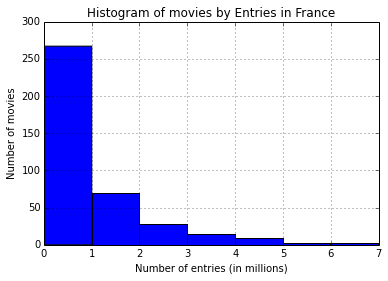

In [3]:
import matplotlib.pyplot as plt
(movies['FrEntries']/1e6).hist(bins=7)
plt.title('Histogram of movies by Entries in France')
plt.xlabel('Number of entries (in millions)')
plt.ylabel('Number of movies')

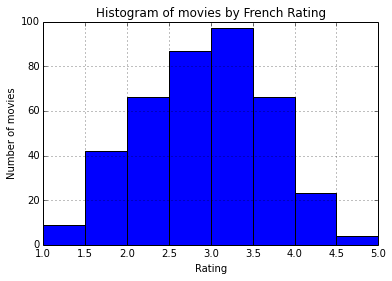

In [4]:
movies['FrRating'].hist(bins=10, range=(0.5,5.5))
plt.title('Histogram of movies by French Rating')
plt.xlabel('Rating')
plt.ylabel('Number of movies')

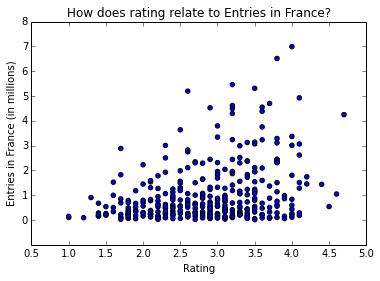

In [5]:
movies_with_rating = movies.dropna()
plt.scatter(movies_with_rating.FrRating , movies_with_rating.FrEntries/1e6)

plt.title('How does rating relate to Entries in France?')
plt.xlabel('Rating')
plt.ylabel('Entries in France (in millions)')

from matplotlib.ticker import MaxNLocator 
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

Let's now focus on the data of movies from a selected list of US studios with rating information

Number of preselected movies (with data): 351
Number of movies from selected studios: 143


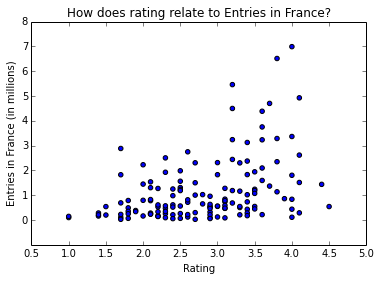

In [6]:
print 'Number of preselected movies (with data):', len(movies_with_rating.index)
movies_with_rating_from_studio = movies_with_rating[ movies_with_rating.Studio.isin(['Fox',
                                                                                     'FoxS',
                                                                                     'WB',
                                                                                     'WB (NL)',
                                                                                     'Disney', 
                                                                                     'Warner Bros.', 
                                                                                     'Metropolitan',
                                                                                     'UPI',
                                                                                     'CBS',
                                                                                     'Sony',
                                                                                     'TriS',
                                                                                     'RTWC',
                                                                                     'Wild Bunch'])]
length = len(movies_with_rating_from_studio.index)
print 'Number of movies from selected studios:', length

plt.scatter(movies_with_rating_from_studio.FrRating , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does rating relate to Entries in France?')
plt.xlabel('Rating')
plt.ylabel('Entries in France (in millions)')
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

Is there any direct relation between rating and entries?

In [8]:
movies_with_rating_from_studio['Ones'] = 1.0

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
import statsmodels.formula.api as sm

X = movies_with_rating_from_studio[['FrRating', 'Ones']]
Y = movies_with_rating_from_studio['FrEntries']

linmodel = sm.OLS(Y, X).fit()
print linmodel.summary()

                            OLS Regression Results                            
Dep. Variable:              FrEntries   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     29.06
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           2.88e-07
Time:                        15:57:41   Log-Likelihood:                -2201.5
No. Observations:                 143   AIC:                             4407.
Df Residuals:                     141   BIC:                             4413.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
FrRating    7.022e+05    1.3e+05      5.391      0.000      4.45e+05   9.6e+05
Ones       -8.044e+05   3.78e+05     -2.130      0.0

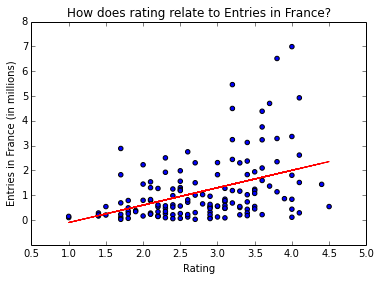

In [10]:
plt.scatter(movies_with_rating_from_studio.FrRating, movies_with_rating_from_studio.FrEntries/1e6)

plt.title('How does rating relate to Entries in France?')
plt.xlabel('Rating')
plt.ylabel('Entries in France (in millions)')

plt.plot(movies_with_rating_from_studio.FrRating, linmodel.predict(X)/1e6, 'r-')

plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

Doublecheck with sklearn...

In [11]:
from sklearn.linear_model import LinearRegression

X = movies_with_rating_from_studio[['FrRating']]
Y = movies_with_rating_from_studio['FrEntries']

sk_linmodel = LinearRegression()
sk_linmodel.fit(X,Y)

print 'coefficient:\t %g' % sk_linmodel.coef_
print 'intercept:  \t %g' % sk_linmodel.intercept_
print 'R^2:        \t %g' % sk_linmodel.score(X,Y)


coefficient:	 702188
intercept:  	 -804445
R^2:        	 0.170878


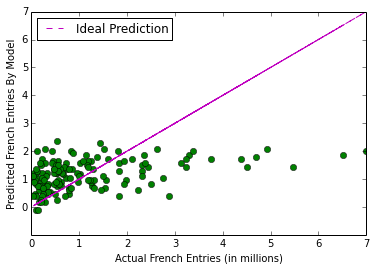

In [12]:
plt.plot(Y/1e6, sk_linmodel.predict(X)/1e6, 'go')
plt.xlabel('Actual French Entries (in millions)')
plt.ylabel('Predicted French Entries By Model')

plt.plot(Y/1e6, Y/1e6, 'm--', label='Ideal Prediction')
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.legend(loc='upper left')

The basic model is not very satisfactory. We will then use other information to get a better result...

In [14]:
movies_with_rating_from_studio['ReleaseDelta'] = \
            [(((d1-d2).total_seconds())/86400.0) for d1, d2 in \
             zip(movies_with_rating_from_studio.FrenchReleaseDate, movies_with_rating_from_studio.USReleaseDate)]
    
movies_with_rating_from_studio['FrRating2'] = [x*x for x in movies_with_rating_from_studio.FrRating]
movies_with_rating_from_studio['ReleaseDelta2'] = [x*x for x in movies_with_rating_from_studio.ReleaseDelta]
movies_with_rating_from_studio['USOpening2'] = [x*x for x in movies_with_rating_from_studio.USOpening]

from math import sqrt 
movies_with_rating_from_studio['FrRatingSqrt'] = [sqrt(x) for x in movies_with_rating_from_studio.FrRating]
from math import log 
movies_with_rating_from_studio['FrRatingLog'] = [log(x) for x in movies_with_rating_from_studio.FrRating]
from math import log10
movies_with_rating_from_studio['Log10FrEntries'] = [log10(x) for x in movies_with_rating_from_studio.FrEntries]
movies_with_rating_from_studio['Log10USOpening'] = [log10(x) for x in movies_with_rating_from_studio.USOpening]
movies_with_rating_from_studio['Log10ReleaseDelta'] = [log10(x+180) for x in movies_with_rating_from_studio.ReleaseDelta]
movies_with_rating_from_studio['InvReleaseDelta'] = [1/(x+1) for x in movies_with_rating_from_studio.ReleaseDelta]

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentat

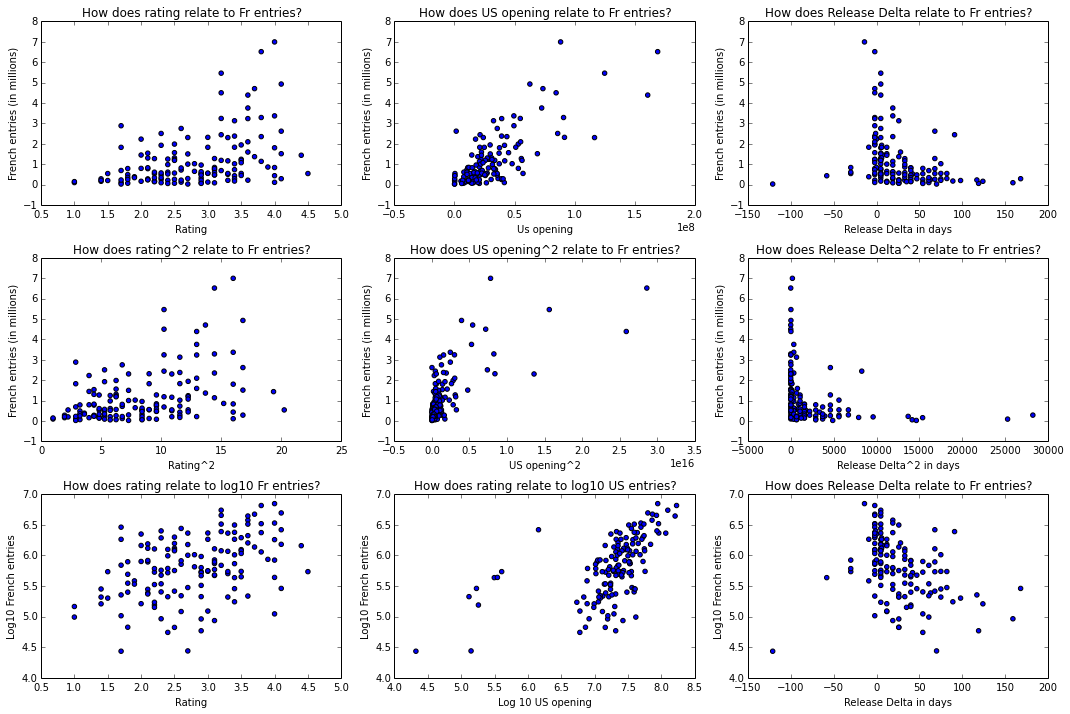

In [15]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplot(3,3,1)
plt.scatter(movies_with_rating_from_studio.FrRating , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does rating relate to Fr entries?')
plt.xlabel('Rating')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,2)
plt.scatter(movies_with_rating_from_studio.USOpening , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does US opening relate to Fr entries?')
plt.xlabel('Us opening')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,3)
plt.scatter(movies_with_rating_from_studio.ReleaseDelta , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does Release Delta relate to Fr entries?')
plt.xlabel('Release Delta in days')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,4)
plt.scatter(movies_with_rating_from_studio.FrRating2 , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does rating^2 relate to Fr entries?')
plt.xlabel('Rating^2')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,5)
plt.scatter(movies_with_rating_from_studio.USOpening2 , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does US opening^2 relate to Fr entries?')
plt.xlabel('US opening^2')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,6)
plt.scatter(movies_with_rating_from_studio.ReleaseDelta2 , movies_with_rating_from_studio.FrEntries/1e6 )
plt.title('How does Release Delta^2 relate to Fr entries?')
plt.xlabel('Release Delta^2 in days')
plt.ylabel('French entries (in millions)')

plt.subplot(3,3,7)
plt.scatter(movies_with_rating_from_studio.FrRating , movies_with_rating_from_studio.Log10FrEntries )
plt.title('How does rating relate to log10 Fr entries?')
plt.xlabel('Rating')
plt.ylabel('Log10 French entries')

plt.subplot(3,3,8)
plt.scatter(movies_with_rating_from_studio.Log10USOpening , movies_with_rating_from_studio.Log10FrEntries )
plt.title('How does rating relate to log10 US entries?')
plt.xlabel('Log 10 US opening')
plt.ylabel('Log10 French entries')

plt.subplot(3,3,9)
plt.scatter(movies_with_rating_from_studio.ReleaseDelta , movies_with_rating_from_studio.Log10FrEntries )
plt.title('How does Release Delta relate to Fr entries?')
plt.xlabel('Release Delta in days')
plt.ylabel('Log10 French entries')

plt.tight_layout()

We can feel some linearity between log base 10 of french entries and french rating, the delta in release dates as well as log base 10 of US opening

How about the relation between other parameters?

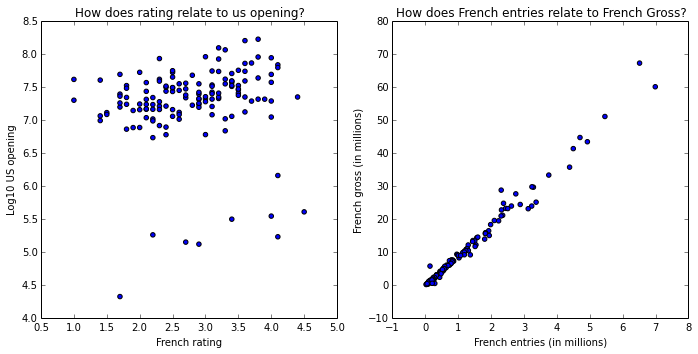

In [16]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.subplot(1,2,1)
plt.scatter(movies_with_rating_from_studio.FrRating , movies_with_rating_from_studio.Log10USOpening )
plt.title('How does rating relate to us opening?')
plt.xlabel('French rating')
plt.ylabel('Log10 US opening')

plt.subplot(1,2,2)
plt.scatter(movies_with_rating_from_studio.FrEntries/1e6 , movies_with_rating_from_studio.FrenchGross/1e6 )
plt.title('How does French entries relate to French Gross?')
plt.xlabel('French entries (in millions)')
plt.ylabel('French gross (in millions)')

plt.tight_layout()

Which are those movies that have a US opening that is not in the main set? we may need to analyze them further by getting additional data from Mojo...

In [17]:
select=movies_with_rating_from_studio[movies_with_rating_from_studio.Log10USOpening < 6.5]
print select[['MovieName','USOpening','USOpeningTheaters','Studio','ReleaseDelta','FrRating','FrEntries']]

                       MovieName  USOpening  USOpeningTheaters Studio  \
181          Inside Llewyn Davis     405411                  4    CBS   
188            Only God Forgives     313958                 78   RTWC   
216                       Trance     131145                  4   FoxS   
354                 Bachelorette     181494                 47   RTWC   
373  Beasts of the Southern Wild     169702                  4   FoxS   
386                  Ruby Sparks     140822                 13   FoxS   
394             Lay the Favorite      20998                 61   RTWC   
420                   Black Swan    1443809                 18   FoxS   
487                        Shame     349519                 10   FoxS   

     ReleaseDelta  FrRating  FrEntries  
181           -30       4.5     541937  
188           -58       3.4     432347  
216            33       2.9     211508  
354            40       2.2     154345  
373           168       4.1     288085  
386            70      

Let's improve our model

In [18]:
X = movies_with_rating_from_studio[['FrRating','USOpening','ReleaseDelta','Ones']]
Y = movies_with_rating_from_studio['FrEntries']
linmodel = sm.OLS(Y,X).fit()
print linmodel.summary()

                            OLS Regression Results                            
Dep. Variable:              FrEntries   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     87.50
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           7.38e-32
Time:                        15:58:08   Log-Likelihood:                -2139.0
No. Observations:                 143   AIC:                             4286.
Df Residuals:                     139   BIC:                             4298.
Df Model:                           3                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
FrRating      3.402e+05   8.88e+04      3.832      0.000      1.65e+05  5.16e+05
USOpening        0.0322      0.002     13.029 

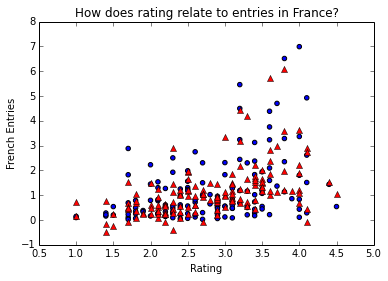

In [19]:
plt.scatter(movies_with_rating_from_studio.FrRating, movies_with_rating_from_studio.FrEntries/1e6)

plt.title('How does rating relate to entries in France?')
plt.xlabel('Rating')
plt.ylabel('French Entries')

plt.plot(movies_with_rating_from_studio.FrRating, linmodel.predict(X)/1e6, 'r^')

Using log base 10

In [20]:
X = movies_with_rating_from_studio[['FrRating','Log10USOpening','ReleaseDelta','Ones']]
Y = movies_with_rating_from_studio['Log10FrEntries']
linmodel = sm.OLS(Y,X).fit()
print linmodel.summary()

                            OLS Regression Results                            
Dep. Variable:         Log10FrEntries   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     53.58
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           4.46e-23
Time:                        15:58:11   Log-Likelihood:                -50.292
No. Observations:                 143   AIC:                             108.6
Df Residuals:                     139   BIC:                             120.4
Df Model:                           3                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
FrRating           0.2277      0.039      5.836      0.000         0.151     0.305
Log10USOpening     0.4490      0.049    

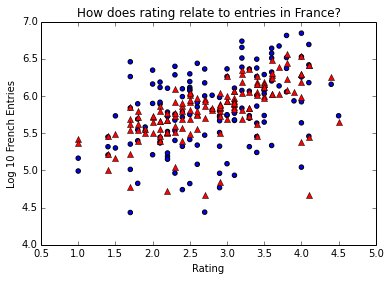

In [21]:
plt.scatter(movies_with_rating_from_studio.FrRating, movies_with_rating_from_studio.Log10FrEntries)

plt.title('How does rating relate to entries in France?')
plt.xlabel('Rating')
plt.ylabel('Log 10 French Entries')

plt.plot(movies_with_rating_from_studio.FrRating, linmodel.predict(X), 'r^')

The model seems OK. Let's challenge it...

In [22]:
from sklearn.linear_model import LinearRegression

m = movies_with_rating_from_studio

X = m[['FrRating','Log10USOpening','ReleaseDelta','Ones']]
Y = m['Log10FrEntries']

sk_linmodel = LinearRegression()
sk_linmodel.fit(X,Y)
Ymodel=sk_linmodel.predict(X)

print X.head(2)

   FrRating  Log10USOpening  ReleaseDelta  Ones
1       3.6        7.861005            19     1
2       3.8        7.958199            -2     1


In [23]:
noise = Y-Ymodel
noise_mean = noise.mean()
noise_stdev = noise.std()
beta1 = sk_linmodel.coef_[0]
beta2 = sk_linmodel.coef_[1]
beta3 = sk_linmodel.coef_[2]
beta0 = sk_linmodel.intercept_

print 'Noise mean = %.3f' % noise_mean
print 'Noise std = %.3f' % noise_stdev
print 'B1 = %.3f, B2 = %.4f, B3 = %.5f, B0 = %.3f' % (beta1, beta2, beta3, beta0)

Noise mean = 0.000
Noise std = 0.345
B1 = 0.228, B2 = 0.4490, B3 = -0.00369, B0 = 2.003


Q-Q plot

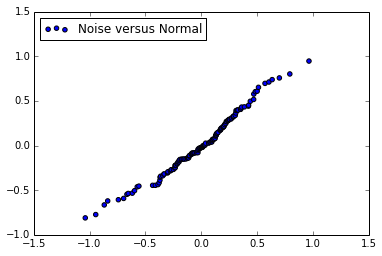

In [24]:
measurements = np.random.normal(loc = noise_mean, scale = noise_stdev, size=length)   
plt.scatter(sorted(noise), sorted(measurements), label='Noise versus Normal')
plt.legend(loc='upper left')

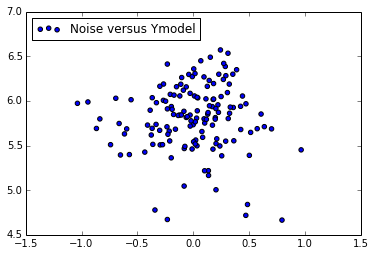

In [25]:
plt.scatter(noise, Ymodel, label='Noise versus Ymodel')
plt.legend(loc='upper left')

Ridge

In [26]:
from sklearn.linear_model import Ridge
Rmodel = Ridge(1.0)
Rmodel.fit(X,Y)
Yridge=Rmodel.predict(X)

Rnoise = Y-Yridge
Rnoise_mean = Rnoise.mean()
Rnoise_stdev = Rnoise.std()
Rbeta1 = Rmodel.coef_[0]
Rbeta2 = Rmodel.coef_[1]
Rbeta3 = Rmodel.coef_[2]
Rbeta0 = Rmodel.intercept_

print 'Ridge Noise mean = %.3f' % Rnoise_mean
print 'Ridge Noise std = %.3f' % Rnoise_stdev
print 'Ridge B1 = %.3f, B2 = %.4f, B3 = %.5f, B0 = %.3f' % (Rbeta1, Rbeta2, Rbeta3, Rbeta0)

print 'Noise mean = %.3f' % noise_mean
print 'Noise std = %.3f' % noise_stdev
print 'B1 = %.3f, B2 = %.4f, B3 = %.5f, B0 = %.3f' % (beta1, beta2, beta3, beta0)

Ridge Noise mean = 0.000
Ridge Noise std = 0.345
Ridge B1 = 0.225, B2 = 0.4405, B3 = -0.00370, B0 = 2.072
Noise mean = 0.000
Noise std = 0.345
B1 = 0.228, B2 = 0.4490, B3 = -0.00369, B0 = 2.003


How betas change with small variations of data

In [27]:
sk_linmodel = LinearRegression()
sk_linmodel.fit(X[5:],Y[5:])
Ymodel=sk_linmodel.predict(X[5:])
beta1 = sk_linmodel.coef_[0]
beta2 = sk_linmodel.coef_[1]
beta3 = sk_linmodel.coef_[2]
beta0 = sk_linmodel.intercept_

print 'B1 = %.3f, B2 = %.4f, B3 = %.5f, B0 = %.3f' % (beta1, beta2, beta3, beta0)

sk_linmodel.fit(X[:-5],Y[:-5])
Ymodel=sk_linmodel.predict(X[:-5])
beta1 = sk_linmodel.coef_[0]
beta2 = sk_linmodel.coef_[1]
beta3 = sk_linmodel.coef_[2]
beta0 = sk_linmodel.intercept_

print 'B1 = %.3f, B2 = %.4f, B3 = %.5f, B0 = %.3f' % (beta1, beta2, beta3, beta0)

B1 = 0.214, B2 = 0.4390, B3 = -0.00367, B0 = 2.103
B1 = 0.236, B2 = 0.4376, B3 = -0.00351, B0 = 2.068


Fit a model to a training set. Calculate mean squared error on the training set. Then calculate it on the test set.

In [28]:
mtraining = m[:length*3/4]
mtest = m[length*3/4:]

In [29]:
Xtraining = mtraining[['FrRating','Log10USOpening','ReleaseDelta','Ones']]
Ytraining = mtraining['Log10FrEntries']

sk_linmodel_training = LinearRegression()
sk_linmodel_training.fit(Xtraining,Ytraining)

from sklearn.metrics import mean_squared_error 
print 'Training error: %.2f' % mean_squared_error(Ytraining,sk_linmodel_training.predict(Xtraining))

Training error: 0.13


In [30]:
Xtest = mtest[['FrRating','Log10USOpening','ReleaseDelta','Ones']]
Ytest = mtest['Log10FrEntries']

print 'Test error: %.2f' % mean_squared_error(Ytest,sk_linmodel_training.predict(Xtest))

Test error: 0.09


Try polynomial fits from 0 to 7th order on French Rating

In [31]:
m = movies_with_rating_from_studio[['Log10FrEntries','Log10USOpening','ReleaseDelta','Ones','FrRating']]
for i in range(6):
    m['X'+str(i+2)]=[pow(x, i+2) for x in m['FrRating']]

mtraining = m[:length*3/4]
mtest = m[length*3/4:]

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
Ytraining = mtraining['Log10FrEntries']
Ytest = mtest['Log10FrEntries']

training_error=[]
test_error=[]
r_squared=[]
aic=[]

for i in range(8):
    Xtraining = mtraining.iloc[:,1:4+i]
    sk_linmodel_training = LinearRegression()
    sk_linmodel_training.fit(Xtraining,Ytraining)
    Xtest = mtest.iloc[:,1:4+i]

    training_error.append(mean_squared_error(Ytraining,sk_linmodel_training.predict(Xtraining)))
    test_error.append(mean_squared_error(Ytest,sk_linmodel_training.predict(Xtest)))
    
    r_squared.append(sk_linmodel_training.score(Xtraining,Ytraining))
    
    linmodel = sm.OLS(Ytraining, Xtraining).fit()
    res = str(linmodel.summary())
    i = res.split().index('AIC:') 
    aic.append(res.split()[i+1])


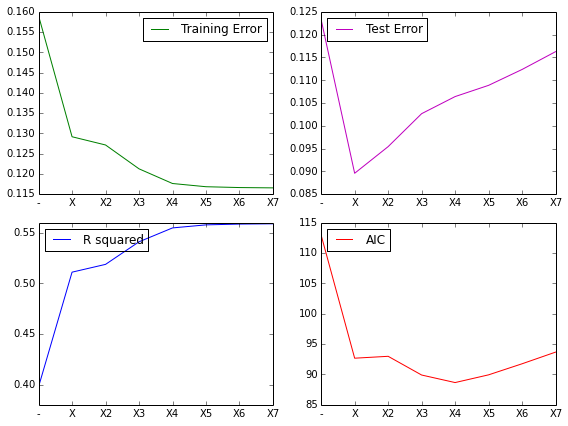

In [33]:
labels = ['-', 'X', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'] 

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)
plt.xlabel('complexity')
plt.ylabel('value')
plt.subplot(2,2,1)
plt.xticks(range(8), labels) 
plt.plot(range(8), training_error, 'g-', label='Training Error')
plt.legend(loc='upper right')
plt.subplot(2,2,2)
plt.xticks(range(8), labels) 
plt.plot(range(8), test_error, 'm-', label='Test Error')
plt.legend(loc='upper left')
plt.subplot(2,2,3)
plt.xticks(range(8), labels) 
plt.plot(range(8), r_squared, 'b-', label='R squared')
plt.legend(loc='upper left')
plt.subplot(2,2,4)
plt.xticks(range(8), labels) 
plt.plot(range(8), aic, 'r-', label='AIC')
plt.legend(loc='upper left')
plt.tight_layout()

This does not look meaningful above 1.

Try polynomial fits from 0 to 7th order on Log 10 US Opening

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


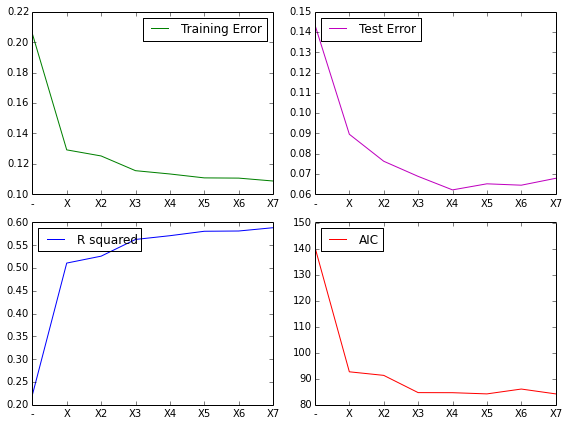

In [34]:
m = movies_with_rating_from_studio[['Log10FrEntries','FrRating','ReleaseDelta','Ones','Log10USOpening']]
for i in range(6):
    m['X'+str(i+2)]=[pow(x, i+2) for x in m['Log10USOpening']]

mtraining = m[:length*3/4]
mtest = m[length*3/4:]

Ytraining = mtraining['Log10FrEntries']
Ytest = mtest['Log10FrEntries']

training_error=[]
test_error=[]
r_squared=[]
aic=[]

for i in range(8):
    Xtraining = mtraining.iloc[:,1:4+i]
    sk_linmodel_training = LinearRegression()
    sk_linmodel_training.fit(Xtraining,Ytraining)
    Xtest = mtest.iloc[:,1:4+i]

    training_error.append(mean_squared_error(Ytraining,sk_linmodel_training.predict(Xtraining)))
    test_error.append(mean_squared_error(Ytest,sk_linmodel_training.predict(Xtest)))
    
    r_squared.append(sk_linmodel_training.score(Xtraining,Ytraining))
    
    linmodel = sm.OLS(Ytraining, Xtraining).fit()
    res = str(linmodel.summary())
    i = res.split().index('AIC:') 
    aic.append(res.split()[i+1])

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)
labels = ['-', 'X', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'] 
plt.xlabel('complexity')
plt.ylabel('value')
plt.subplot(2,2,1)
plt.xticks(range(8), labels) 
plt.plot(range(8), training_error, 'g-', label='Training Error')
plt.legend(loc='upper right')
plt.subplot(2,2,2)
plt.xticks(range(8), labels) 
plt.plot(range(8), test_error, 'm-', label='Test Error')
plt.legend(loc='upper left')
plt.subplot(2,2,3)
plt.xticks(range(8), labels) 
plt.plot(range(8), r_squared, 'b-', label='R squared')
plt.legend(loc='upper left')
plt.subplot(2,2,4)
plt.xticks(range(8), labels) 
plt.plot(range(8), aic, 'r-', label='AIC')
plt.legend(loc='upper left')
plt.tight_layout()

The 4th order looks good but checking the t values - this test fails!

In [35]:
linmodel = sm.OLS(Ytraining, mtraining.iloc[:,1:8]).fit()
print linmodel.summary()

                            OLS Regression Results                            
Dep. Variable:         Log10FrEntries   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     22.19
Date:                Wed, 15 Apr 2015   Prob (F-statistic):           1.86e-16
Time:                        15:58:35   Log-Likelihood:                -35.325
No. Observations:                 107   AIC:                             84.65
Df Residuals:                     100   BIC:                             103.4
Df Model:                           6                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
FrRating           0.1613      0.052      3.126      0.002         0.059     0.264
ReleaseDelta      -0.0037      0.001    

Let's check now if our data set is sufficient to make a conclusion by plotting the learning curve.

Fit a model to only the first 4 data points (m=1). Then to first 8 (m=2). Then to first 12 (m=3). In this manner until fiting the entire training set. For each step, calculate the training error and the test error. Plot both over m. 

In [36]:
m = movies_with_rating_from_studio[['Log10FrEntries','FrRating','Log10USOpening','ReleaseDelta','Ones']]

In [37]:
training_error=[]
test_error=[]

for i in range(1,29):
    Ytraining = m.iloc[0:i*4,0:1]
    Ytest = m.iloc[i*4:i*5,0:1]
    Xtraining = m.iloc[0:i*4,1:5]
    sk_linmodel_training = LinearRegression()
    sk_linmodel_training.fit(Xtraining,Ytraining)
    Xtest = m.iloc[i*4:i*5,1:5]

    training_error.append(mean_squared_error(Ytraining,sk_linmodel_training.predict(Xtraining)))
    test_error.append(mean_squared_error(Ytest,sk_linmodel_training.predict(Xtest)))

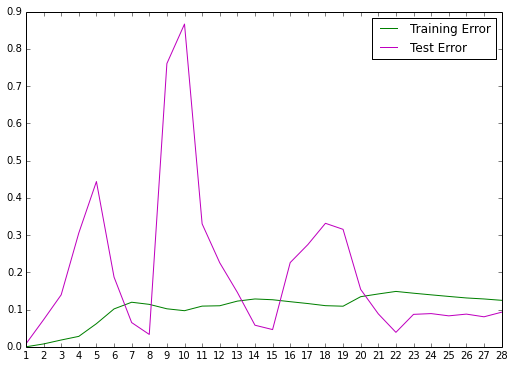

In [38]:
labels = range(1,29)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(14)
plt.xlabel('complexity')
plt.ylabel('value')
plt.subplot(2,2,1)
plt.xticks(range(28), labels) 
plt.plot(range(28), training_error, 'g-', label='Training Error')
plt.legend(loc='upper left')
plt.plot(range(28), test_error, 'm-', label='Test Error')
plt.legend(loc='upper right')

plt.tight_layout()

The error seems converging...

Now let's get some insights from the model!

In [39]:
import random
def underlying_gross_model(FrRating, Log10USOpening, ReleaseDelta, beta0, beta1, beta2, beta3, noise_mean, noise_stdev):
    log10rev = beta1 * FrRating + beta2 * Log10USOpening + beta3 * ReleaseDelta + beta0 + random.gauss(noise_mean, noise_stdev)
    return pow(10,log10rev)

In [40]:
mean_rating = float(movies_with_rating_from_studio[['FrRating']].mean())
print 'Mean French Rating: %0.2f' % mean_rating
mean_usopening = float(movies_with_rating_from_studio[['USOpening']].mean())
print 'Mean US opening: %0.2f' % mean_usopening
mean_releasedelta = float(movies_with_rating_from_studio[['ReleaseDelta']].mean())
print 'Mean Delta Release date: %0.2f' % mean_releasedelta

Mean French Rating: 2.80
Mean US opening: 30334400.05
Mean Delta Release date: 25.03


In [41]:
mean_entries = underlying_gross_model(mean_rating, log10(mean_usopening), mean_releasedelta,
                                      beta0, beta1, beta2, beta3, 0, 0)
print 'Mean entries: %i' % mean_entries

Mean entries: 820035


In [42]:
mean_entries_minus1star = underlying_gross_model(mean_rating-0.05, log10(mean_usopening), mean_releasedelta,
                                                beta0, beta1, beta2, beta3, 0, 0)
print 'Cost of one star from 1 journalist / 20: %i entries' % (mean_entries-mean_entries_minus1star)

Cost of one star from 1 journalist / 20: 21948 entries


In [43]:
mean_entries_minus20stars = underlying_gross_model(mean_rating-1, log10(mean_usopening), mean_releasedelta,
                                                beta0, beta1, beta2, beta3, 0, 0)
print 'Cost of one star from all journalists: %i entries' % (mean_entries-mean_entries_minus20stars)

Cost of one star from all journalists: 343398 entries


In [44]:
mean_entries_plus1day = underlying_gross_model(mean_rating, log10(mean_usopening), mean_releasedelta+1,
                                                beta0, beta1, beta2, beta3, 0, 0)
print 'Cost of one day of delay to release: %i entries' % (mean_entries-mean_entries_plus1day)

Cost of one day of delay to release: 6596 entries


In [45]:
mean_entries_plus1week = underlying_gross_model(mean_rating, log10(mean_usopening), mean_releasedelta+7,
                                                beta0, beta1, beta2, beta3, 0, 0)
print 'Cost of one week of delay to release: %i entries' % (mean_entries-mean_entries_plus1week)

Cost of one week of delay to release: 45074 entries
